### retrieving the data and saving them as CSV file 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Read the text file into a DataFrame
df_demo = pd.read_csv('../Data/Raw data/df_final_demo (1).txt', delimiter=',', header=0)
df_web_data1 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_1.txt', delimiter=',', header=0)
df_web_data2 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_2.txt', delimiter=',', header=0)
df_experiment_clients = pd.read_csv('../Data/Raw data/df_final_experiment_clients.txt', delimiter=',', header=0)




#### 1- Load and Inspect Data

In [2]:
# Display the first few rows of each dataframe to understand their structure
df_demo



,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_web_data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_web_data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


### 2- Data Cleaning

In [6]:
# Merging web data1 and webdata2 
df_web_data = pd.concat([df_web_data1, df_web_data2], ignore_index=True)
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
# Checking for missing values and data types in the 3 datasets
missing_values_demo = df_demo.isnull().sum()
data_types_demo = df_demo.dtypes

missing_values_web = df_web_data.isnull().sum()
data_types_web = df_web_data.dtypes

missing_values_experiment = df_experiment_clients.isnull().sum()
data_types_experiment = df_experiment_clients.dtypes

missing_values_demo, data_types_demo, missing_values_web, data_types_web, missing_values_experiment, data_types_experiment


(client_id            0
 clnt_tenure_yr      14
 clnt_tenure_mnth    14
 clnt_age            15
 gendr               14
 num_accts           14
 bal                 14
 calls_6_mnth        14
 logons_6_mnth       14
 dtype: int64,
 client_id             int64
 clnt_tenure_yr      float64
 clnt_tenure_mnth    float64
 clnt_age            float64
 gendr                object
 num_accts           float64
 bal                 float64
 calls_6_mnth        float64
 logons_6_mnth       float64
 dtype: object,
 client_id       0
 visitor_id      0
 visit_id        0
 process_step    0
 date_time       0
 dtype: int64,
 client_id        int64
 visitor_id      object
 visit_id        object
 process_step    object
 date_time       object
 dtype: object,
 client_id        0
 Variation    20109
 dtype: int64,
 client_id     int64
 Variation    object
 dtype: object)

In [8]:
# Drop rows with missing values in Client demographical Profiles
df_demo_cleaned = df_demo.dropna()

# Drop rows with missing Variation in Experiment Roster
df_experiment_clients_cleaned = df_experiment_clients.dropna(subset=['Variation'])

# Convert date_time to datetime format in Web Data
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

# Verify the cleaning process
missing_values_demo_cleaned = df_demo_cleaned.isnull().sum()
missing_values_experiment_cleaned = df_experiment_clients_cleaned.isnull().sum()
data_types_web_cleaned = df_web_data.dtypes

missing_values_demo_cleaned, missing_values_experiment_cleaned, data_types_web_cleaned

(client_id           0
 clnt_tenure_yr      0
 clnt_tenure_mnth    0
 clnt_age            0
 gendr               0
 num_accts           0
 bal                 0
 calls_6_mnth        0
 logons_6_mnth       0
 dtype: int64,
 client_id    0
 Variation    0
 dtype: int64,
 client_id                int64
 visitor_id              object
 visit_id                object
 process_step            object
 date_time       datetime64[ns]
 dtype: object)

#### Demographic Analysis
Merging Datasets

In [9]:
# merging the client demo and the experiment client data
df_merged = pd.merge(df_demo_cleaned, df_experiment_clients_cleaned, on = 'client_id')
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50483,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50484,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50485,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [10]:

# Numerical columns 
# Primary clients demographics
primary_clients_demo = df_merged.describe()

primary_clients_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000,50487.000000
mean,5.006180e+06,12.031810,150.416365,47.319795,2.254580,1.495168e+05,3.093272,6.131856
std,2.877445e+06,6.860326,81.945403,15.518616,0.533675,3.020390e+05,2.188009,2.175441
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515688e+06,6.000000,82.000000,33.500000,2.000000,3.987718e+04,1.000000,4.000000
50%,5.025043e+06,11.000000,136.000000,48.000000,2.000000,6.573433e+04,3.000000,6.000000
75%,7.477922e+06,16.000000,192.000000,59.500000,2.000000,1.399583e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


##### exploring the numerical columns 

 ##### Univariate Analysis
**Distribution of Age**

**Distribution of Tenure**

**Distribution of Balance**

**Distribution of Logins in the last 6 months**

**Distribution of Calls in the last 6 months**

In [11]:
# Age distribution
age_distribution = df_merged['clnt_age'].describe()
age_distribution


count    50487.000000
mean        47.319795
std         15.518616
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

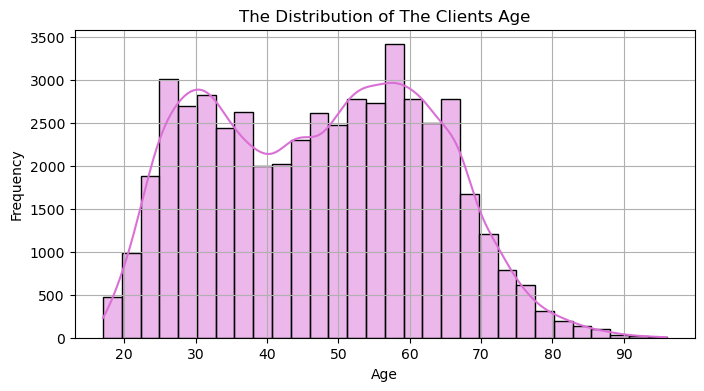

In [12]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_age'],color='orchid', bins=30, kde=True)
plt.title('The Distribution of The Clients Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

recommendations: who are our tipical clinets 
Age_rang
compare this to the test grounp

In [13]:
# Tenure distribution
tenure_distribution = df_merged['clnt_tenure_yr'].describe()
tenure_distribution

count    50487.000000
mean        12.031810
std          6.860326
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

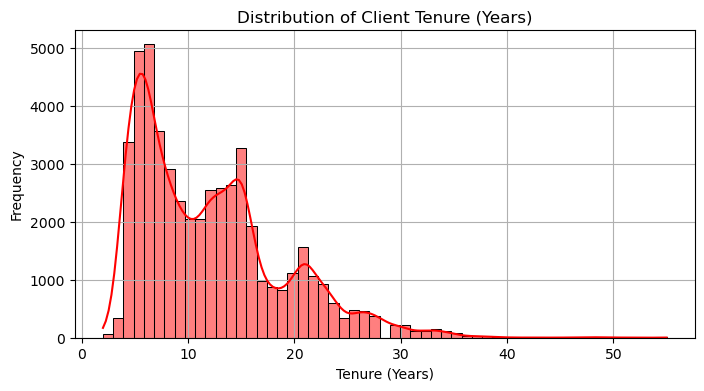

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_tenure_yr'],color='red', bins=55, kde=True)
plt.title('Distribution of Client Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Balance distribution
balance_distribution = df_merged['bal'].describe()
balance_distribution

count    5.048700e+04
mean     1.495168e+05
std      3.020390e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573433e+04
75%      1.399583e+05
max      1.632004e+07
Name: bal, dtype: float64

change from sceintific numbers to actual numbers 

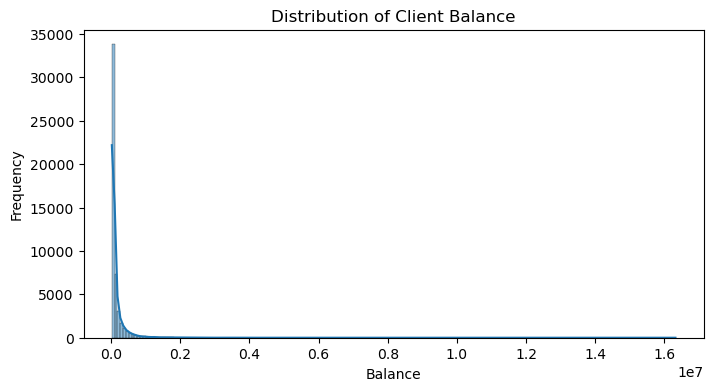

In [16]:

plt.figure(figsize=(8, 4))
sns.histplot(df_merged['bal'], bins=200, kde=True)
plt.title('Distribution of Client Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [17]:
 #Logons distribution

logons_distribution = df_merged['logons_6_mnth'].describe()
logons_distribution

count    50487.000000
mean         6.131856
std          2.175441
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

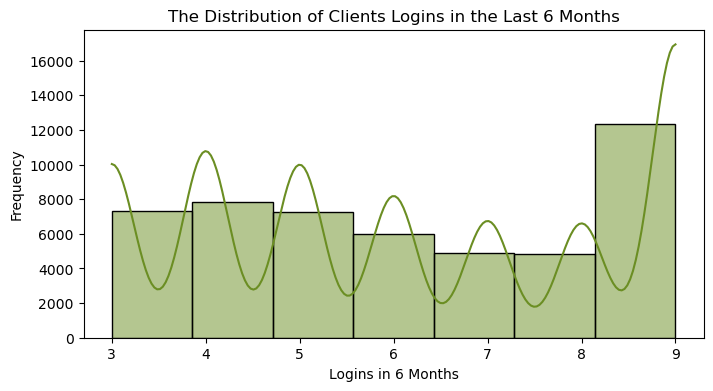

In [18]:
# Distribution of Logins in the last 6 months
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['logons_6_mnth'],color='olivedrab', bins=7, kde=True)
plt.title('The Distribution of Clients Logins in the Last 6 Months')
plt.xlabel('Logins in 6 Months')
plt.ylabel('Frequency')
plt.show()

In [19]:
calls_distribution = df_merged['calls_6_mnth'].describe()
calls_distribution

count    50487.000000
mean         3.093272
std          2.188009
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: calls_6_mnth, dtype: float64

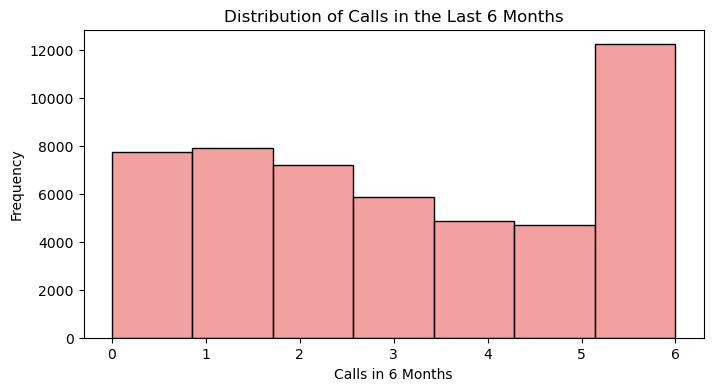

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['calls_6_mnth'],color='lightcoral', bins=7)
plt.title('Distribution of Calls in the Last 6 Months')
plt.xlabel('Calls in 6 Months')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis


**Age vs. Logins**

**Age vs. Balance**

**Tenure vs. Balance**

**Number of Accounts vs. Balance**

**Gender vs. Balance**

In [21]:
# Correlation between age and logins
age_logons_corr = df_merged[['clnt_age', 'logons_6_mnth']].corr().iloc[0, 1]
# Correlation between number of accounts and balance
accts_balance_corr = df_merged[['num_accts', 'bal']].corr().iloc[0, 1]

age_logons_corr, accts_balance_corr


(0.0566399759263761, 0.265913106895121)

**Correlation between age and logins**:0.0566399759263761

**Interpretation**: This is a very weak positive correlation between age and the number of logins in the last 6 months. It means that as age increases, the number of logins slightly increases, but the relationship is very weak and almost negligible.

**Correlation between number of accounts and balance**: 0.265913106895121

**Interpretation**: This is a weak positive correlation between the number of accounts and the balance. It means that clients with more accounts tend to have a higher balance, but the relationship is not very strong.

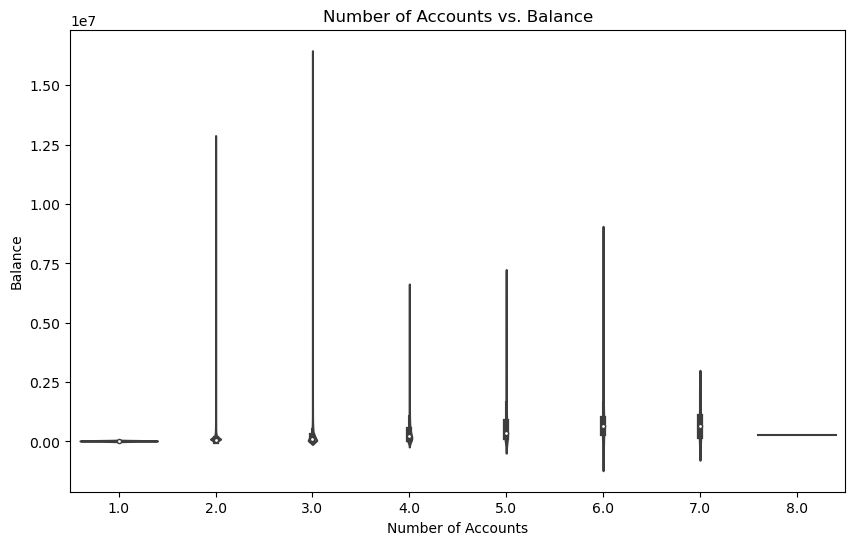

In [22]:
# Violin plot: Number of Accounts vs. Balance
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_accts', y='bal', data=df_demo_cleaned)
plt.title('Number of Accounts vs. Balance')
plt.xlabel('Number of Accounts')
plt.ylabel('Balance')
plt.show()

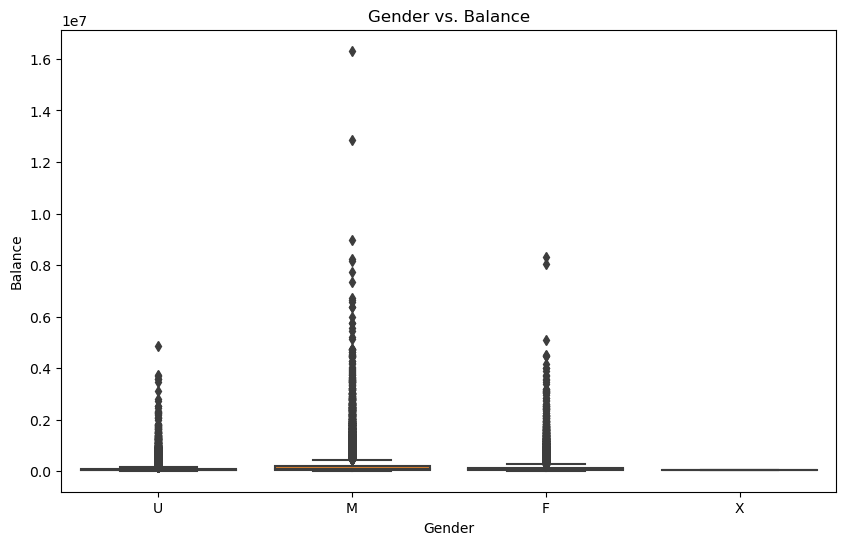

In [23]:
# Box plot: Gender vs. Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='gendr', y='bal', data=df_demo_cleaned)
plt.title('Gender vs. Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

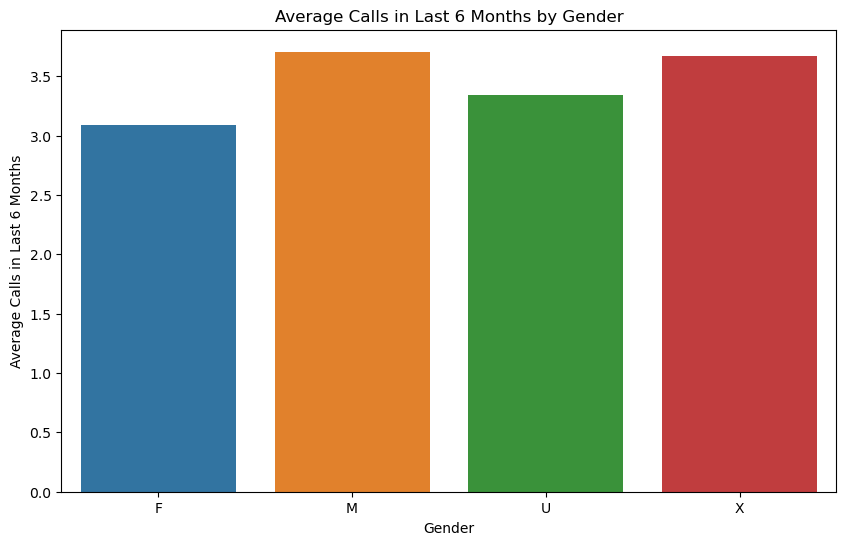

In [24]:
# Bar plot: Gender vs. Calls in Last 6 Months
gender_calls_avg = df_demo_cleaned.groupby('gendr')['calls_6_mnth'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='gendr', y='calls_6_mnth', data=gender_calls_avg)
plt.title('Average Calls in Last 6 Months by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Calls in Last 6 Months')
plt.show()

### merging the Demo with the Web data 

In [25]:
# Merge df_merged with df_web_data
df_final = pd.merge(df_merged, df_web_data, on='client_id')
df_final.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


processing the web page date 
come up with variable to see which page is better than the other 
